<a href="https://colab.research.google.com/github/marinaladeira/Template_M2/blob/main/BTech_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import os
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

tabelas = '/content/drive/Shareddrives/BTECH/BTECH/Tabelas'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning


A etapa de limpeza de dados, conhecida como Data Cleaning, desempenha um papel crucial no projeto, pois clarifica os dados para a execução do trabalho. Ela envolve correções para assegurar análises precisas e confiáveis. Dados limpos minimizam erros e otimizam a manipulação do dataset. A limpeza de dados é essencial para alcançar o melhor resultado no projeto.

In [ ]:
#Tabela de cursos realizados por usuarios
userCursos_df = pd.read_csv(tabelas + "/user_journeys_inteli.csv")
userCursos_df.rename(columns={'user_id': 'id'})

,id,journey_id,fim
0,13973,150,2023-01-26 19:38:53.959153
1,69566,56,2023-01-26 19:32:07.546185
2,160774,262,2023-02-01 19:52:01.685869
3,178725,86,2022-07-05 22:38:04.655936
4,239835,25,2022-08-25 18:27:18.471711
...,...,...,...
60584,1130119,158,2023-07-11 02:53:43.188551
60585,1130135,158,2023-08-09 02:16:32.546992
60586,1130135,86,2023-08-10 00:04:24.855860
60587,1130135,863,2023-08-10 00:07:02.490928


### Dados sobre os usuários (merge de tabelas) - dados categóricos e numéricos

In [ ]:
#Limpeza dados categóricos das tabelas de objetivos do usuário e competências
user_objectives = pd.read_csv(tabelas + "/user_interests_inteli.csv")
user_superfit = pd.read_csv(tabelas +"/user_superfit.csv")

users = pd.merge(user_objectives, user_superfit, how= 'inner', on="id").drop('key', axis = 1)

users = pd.get_dummies(users, columns = ["name"], prefix=[''])

In [ ]:
#Limpando dados dos cursos oferecidos
#Transformação das classificações categóricas das competências em colunas numéricas
df_cursos = pd.read_csv(tabelas + '/journeys_inteli.csv')
df_cursos.competencias.value_counts()

#Cria uma cópia do DF para não modificar dados originais
df_encoded = df_cursos.copy()

# Extrai competências únicas do dataset
all_categories = set()
for categories_str in df_encoded['competencias']:
    if pd.notna(categories_str):
        all_categories.update(category.strip() for category in categories_str.split(' - '))

# Cria colunas numéricas com valor 0 para cada categoria 0
for category in all_categories:
    df_encoded[category] = 0

# Preenche as colunas numéricas de acordo com a presença da competência no curso ou não
for index, row in df_encoded.iterrows():
    categories_list = []
    if pd.notna(row['competencias']):
        categories_list = [category.strip() for category in row['competencias'].split(' - ')]
    for category in categories_list:
        df_encoded.at[index, category] = 1

# Drop na coluna original de competências
df_encoded.drop('competencias', axis=1, inplace=True)


# Filtrar os valores desejados
df_encoded = df_encoded[df_encoded["emp"]!=1]

# Exploração de dados

Após a etapa de limpeza de dados, é essencial realizar uma exploração detalhada para compreender a natureza dos dados em foco e definir como alcançar os objetivos do projeto com precisão.

### Cursos

In [ ]:
#Cursos e suas competências, lembrando que cursos de empresas foram desconsiderados(emp = 1)
# Journeys_inteli modificado
print('Tabela de cursos modificada')
df_encoded

Tabela de cursos modificada


,id,name,type,category_type,average_rating,ratings_count,improve_res,improve_cur,emp,improve_tech,improve_sin,improve_dis,improve_int,improve_neg,plataforma,improve_eng
0,309,Visão de Negócios | Jornada para o Futuro,increase_employability,content,5.0,65,0,0,0,0,1,1,0,0,0,0
1,103,Comunicação escrita - será que você realmente ...,portable_skills,content,4.5,264,0,0,0,0,1,0,1,0,0,1
2,38,Como você faz suas escolhas de carreira? #anco...,know_myself_better,content,4.5,313,1,0,0,0,0,0,1,0,0,0
3,108,Gestão de Projetos - um passo de cada vez,portable_skills,content,4.5,274,0,0,0,0,0,0,1,1,0,0
5,105,Criatividade nos pequenos detalhes,portable_skills,content,4.5,438,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,380,Teste de Excel,pss_engineering,content,4.5,1632,0,0,0,0,0,0,0,0,1,0
203,110,"Calma, vai dar tempo! Aprenda a organizar sua ...",portable_skills,content,4.5,674,0,0,0,0,1,1,0,0,0,0
204,88,Chave Mestra,know_myself_better,assessment,5.0,23278,0,0,0,0,0,0,0,0,1,0
206,851,Soft skill: comunicação | Programa de Estágio ...,soft_skills,content,5.0,331,0,0,0,0,0,0,1,0,0,1


In [ ]:
#Contagens das competências que cada curso melhora

compet_data = {#Faz soma das novas colunas numéricas
'improve_dis' : df_encoded['improve_dis'].sum(),
'improve_cur' : df_encoded['improve_cur'].sum(),
'improve_int': df_encoded['improve_int'].sum(),
'improve_sin' : df_encoded['improve_sin'].sum(),
'improve_eng' : df_encoded['improve_eng'].sum(),
'improve_res' : df_encoded['improve_res'].sum(),
'improve_tech' : df_encoded['improve_tech'].sum(),
'improve_neg' : df_encoded['improve_neg'].sum(),
'plataforma' : df_encoded['plataforma'].sum(),}

tabelaCompet = pd.DataFrame.from_dict(compet_data, orient='index', columns=['Quantidade'])

print('Contagem competências nos cursos:')
tabelaCompet

Contagem competências nos cursos:


,Quantidade
improve_dis,27
improve_cur,46
improve_int,42
improve_sin,33
improve_eng,36
improve_res,26
improve_tech,13
improve_neg,9
plataforma,9


### Usuários

Foi utilizado um merge entre tabela de *objectives* dos usuarios e tabela de superfit dos usuários para criar uma tabela composta que mostra os interesses e competências de cada candidato

In [ ]:
#Usuários, suas competencias e seus interesses, merge de tabelas
print('Tabela competências e objetivos do candidato:')
users

Tabela competências e objetivos do candidato:


,id,superfit_dis,superfit_sin,superfit_cur,superfit_int,superfit_eng,superfit_res,_Administrativo,_Comercial / Vendas,_Engenharia,_Finanças / Contabilidade,_Jurídico,_Logistica / Supply Chain,_Marketing / Comunicação,_Produção / Operações,_RH,_Saúde,_Tecnologia
0,1088739,58.0,56.0,50.0,66.0,60.0,62.0,0,0,0,1,0,0,0,0,0,0,0
1,1088739,58.0,56.0,50.0,66.0,60.0,62.0,0,0,0,0,0,1,0,0,0,0,0
2,1088739,58.0,56.0,50.0,66.0,60.0,62.0,0,0,0,0,0,0,0,0,1,0,0
3,1088739,58.0,56.0,50.0,66.0,60.0,62.0,1,0,0,0,0,0,0,0,0,0,0
4,1084244,64.0,60.0,54.0,52.0,48.0,62.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52900,1020342,60.0,46.0,40.0,66.0,52.0,52.0,0,0,0,0,0,0,0,0,0,1,0
52901,1060570,40.0,50.0,36.0,62.0,48.0,44.0,0,0,0,0,0,0,1,0,0,0,0
52902,1047833,64.0,50.0,48.0,56.0,58.0,60.0,0,1,0,0,0,0,0,0,0,0,0
52903,1047833,64.0,50.0,48.0,56.0,58.0,60.0,1,0,0,0,0,0,0,0,0,0,0


### Superfit (competências)

In [ ]:
#Calcula a média da tabela superfit dos usuários de acordo com a pontuação de cada um

meanUser = {
    "superfit_dis": users['superfit_dis'].mean().round(), #Arredondado por não utilizar valores em float
    "superfit_sin": users['superfit_sin'].mean().round(),
    "superfit_cur": users['superfit_cur'].mean().round(),
    "superfit_int": users['superfit_int'].mean().round(),
    "superfit_eng": users['superfit_eng'].mean().round(),
    "superfit_res": users['superfit_res'].mean().round()
}

#Cria uma nova tabela para as médias
meanUser_df = pd.DataFrame([meanUser])

print('Média de valores das competências dos usuários: ')
meanUser_df

Média de valores das competências dos usuários: 


,superfit_dis,superfit_sin,superfit_cur,superfit_int,superfit_eng,superfit_res
0,57.0,50.0,44.0,52.0,48.0,51.0


In [ ]:
# Contador para categorias de competências superfit do usuário
contador_superfit_user = {
    'superfit_res': 0,
    'superfit_eng': 0,
    'superfit_int': 0,
    'superfit_cur': 0,
    'superfit_sin': 0,
    'superfit_dis': 0
}

# Percorrer cada linha do dataframe
for index, row in user_superfit.iterrows():
    superfit_res = row['superfit_res']
    superfit_eng = row['superfit_eng']
    superfit_int = row['superfit_int']
    superfit_cur = row['superfit_cur']
    superfit_sin = row['superfit_sin']
    superfit_dis = row['superfit_dis']

    #Cria uma lista com todos os valores da linha e procura o valor máximo
    lista = [superfit_res, superfit_eng, superfit_int, superfit_cur, superfit_sin, superfit_dis]
    maiorIndex = lista.index(max(lista))

    #A competência que tiver o maior valor na linha terá o valor de 1 somado a sua contagem total
    if maiorIndex == 0:
        contador_superfit_user['superfit_res'] += 1
    elif maiorIndex == 1:
        contador_superfit_user['superfit_eng'] += 1
    elif maiorIndex == 2:
        contador_superfit_user['superfit_int'] += 1
    elif maiorIndex == 3:
        contador_superfit_user['superfit_cur'] += 1
    elif maiorIndex == 4:
        contador_superfit_user['superfit_sin'] += 1
    elif maiorIndex == 5:
        contador_superfit_user['superfit_dis'] += 1

# Criação do DataFrame a partir do contador
df_counter = pd.DataFrame.from_dict(contador_superfit_user, orient='index', columns=['Counter'])

# Reset do índice para mover as competências para uma coluna
df_counter.reset_index(inplace=True)
df_counter.rename(columns={'index': 'Competencias'}, inplace=True)
print('Competências mais frequentes dos usuários:')
df_counter

Competências mais frequentes dos usuários:


,Competencias,Counter
0,superfit_res,11159
1,superfit_eng,5023
2,superfit_int,13208
3,superfit_cur,2622
4,superfit_sin,6056
5,superfit_dis,35891


In [ ]:
#Exploração de quais competências são mais pedidas pelas vagas oferecidas
#Abre o arquivo CSV superfit das vagas
data_superfit_job = pd.read_csv(tabelas + '/job_opportunity_superfit_consolidates.csv').drop(columns = ["created_at", "updated_at", "average_distance"])

#Estabelece as contagens iniciais como 0
contador_superfit_job = {
    'score_res': 0,
    'score_eng': 0,
    'score_int': 0,
    'score_cur': 0,
    'score_sin': 0,
    'score_dis': 0
}

# Itera por  cada linha do dataframe
for index, row in data_superfit_job.iterrows():
    #Designa as variáveis as suas respectivas colunas
    score_res = row['score_res']
    score_eng = row['score_eng']
    score_int = row['score_int']
    score_cur = row['score_cur']
    score_sin = row['score_sin']
    score_dis = row['score_dis']

    #Cria uma lista com todos os valores da linha e procura o maior entre eles
    lista = [score_res, score_eng, score_int, score_cur, score_sin, score_dis]
    maiorIndex = lista.index(max(lista))

    #A competência que tiver o maior valor na linha terá o valor de 1 somado a sua contagem total
    if maiorIndex == 0:
        contador_superfit_job['score_res'] += 1
    elif maiorIndex == 1:
        contador_superfit_job['score_eng'] += 1
    elif maiorIndex == 2:
        contador_superfit_job['score_int'] += 1
    elif maiorIndex == 3:
        contador_superfit_job['score_cur'] += 1
    elif maiorIndex == 4:
        contador_superfit_job['score_sin'] += 1
    elif maiorIndex == 5:
        contador_superfit_job['score_dis'] += 1

counter_superfit_job = pd.DataFrame.from_dict(contador_superfit_job, orient='index', columns=['lista'])
counter_superfit_job.rename(columns={'lista': 'Counter'}, inplace=True)
#Numero de vezes que cada competencia apareceu como a mais alta em uma vaga

print('Tabela com estatísticas sobre as competências: ')
data_superfit_job.describe()


Tabela com estatísticas sobre as competências: 


,id,job_opportunity_id,score_res,score_eng,score_int,score_cur,score_sin,score_dis
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1899.000000,2834.124260,32.532544,29.502959,33.988166,27.076923,33.372781,35.846154
std,48.930222,83.831335,6.204871,6.910245,7.356555,7.030546,6.020557,7.562439
min,1815.000000,2666.000000,16.000000,10.000000,16.000000,12.000000,16.000000,8.000000
25%,1857.000000,2766.000000,28.000000,26.000000,30.000000,22.000000,28.000000,30.000000
50%,1899.000000,2834.000000,32.000000,30.000000,34.000000,26.000000,34.000000,36.000000
75%,1941.000000,2909.000000,36.000000,34.000000,38.000000,32.000000,38.000000,42.000000
max,1983.000000,2967.000000,46.000000,46.000000,52.000000,46.000000,48.000000,52.000000


In [ ]:
#Calcula a média dos valores para cada competência nas vagas
meanJob = {
    "score_dis": data_superfit_job['score_dis'].mean().round(),
    "score_sin": data_superfit_job['score_sin'].mean().round(),
    "score_cur": data_superfit_job['score_cur'].mean().round(),
    "score_int": data_superfit_job['score_int'].mean().round(),
    "score_eng": data_superfit_job['score_eng'].mean().round(),
    "score_res": data_superfit_job['score_res'].mean().round()
}
meanJob_df = pd.DataFrame([meanJob])

print('Média dos valores das competências(vagas): ')
meanJob_df

Média dos valores das competências(vagas): 


,score_dis,score_sin,score_cur,score_int,score_eng,score_res
0,36.0,33.0,27.0,34.0,30.0,33.0


### Lifestyle

In [ ]:
#Contagem dos estilos de vida mais comuns entre os usuários

# Abrir arquivo CSV
user_lifestyle = pd.read_csv(tabelas + '/user_lifestyle.csv')

# Contador para estilos de vida (primeira ocorrência)
contador_lifestyle_users = {
    'lifestyle_classic': 0,
    'lifestyle_order': 0,
    'lifestyle_change': 0,
    'lifestyle_tireless': 0,
    'lifestyle_explorer': 0,
    'lifestyle_specialist': 0,
    'lifestyle_generalist': 0,
    'lifestyle_hybrid': 0,
}

# Contador para estilos de vida (segunda ocorrência)
contador_lifestyle_users_2 = {
    'lifestyle_classic': 0,
    'lifestyle_order': 0,
    'lifestyle_change': 0,
    'lifestyle_tireless': 0,
    'lifestyle_explorer': 0,
    'lifestyle_specialist': 0,
    'lifestyle_generalist': 0,
    'lifestyle_hybrid': 0,
}

# Loop para cada linha da tabela e soma no contador
for index, row in user_lifestyle.iterrows():
    # Extrair os valores dos diferentes estilos de vida da linha atual
    lifestyle_classic = row['lifestyle_classic']
    lifestyle_order = row['lifestyle_order']
    lifestyle_change = row['lifestyle_change']
    lifestyle_tireless = row['lifestyle_tireless']
    lifestyle_explorer = row['lifestyle_explorer']
    lifestyle_specialist = row['lifestyle_specialist']
    lifestyle_generalist = row['lifestyle_generalist']
    lifestyle_hybrid = row['lifestyle_hybrid']

    # Criar uma lista com os valores dos estilos de vida
    lista = [lifestyle_classic, lifestyle_order, lifestyle_tireless, lifestyle_explorer, lifestyle_generalist, lifestyle_hybrid]

    # Encontrar o índice do maior valor na lista
    maiorValor = max(lista)
    maiorIndex = lista.index(maiorValor)

    # Criar uma lista ordenada de forma decrescente
    lista_ordenada = sorted(lista, reverse=True)
    segundoMaiorIndex = lista_ordenada[1]

    # Incrementar o contador correspondente ao estilo de vida com o maior valor
    if maiorIndex == 0:
        contador_lifestyle_users['lifestyle_classic'] += 1
    elif maiorIndex == 1:
        contador_lifestyle_users['lifestyle_order'] += 1
    elif maiorIndex == 2:
        contador_lifestyle_users['lifestyle_change'] += 1
    elif maiorIndex == 3:
        contador_lifestyle_users['lifestyle_change'] += 1
    elif maiorIndex == 4:
        contador_lifestyle_users['lifestyle_tireless'] += 1
    elif maiorIndex == 5:
        contador_lifestyle_users['lifestyle_explorer'] += 1
    elif maiorIndex == 6:
        contador_lifestyle_users['lifestyle_specialist'] += 1
    elif maiorIndex == 7:
        contador_lifestyle_users['lifestyle_generalist'] += 1
    elif maiorIndex == 8:
        contador_lifestyle_users['lifestyle_hybrid'] += 1

    # Incrementar o contador correspondente ao segundo maior valor
    if segundoMaiorIndex == 0:
        contador_lifestyle_users_2['lifestyle_classic'] += 1
    elif segundoMaiorIndex == 1:
        contador_lifestyle_users_2['lifestyle_order'] += 1
    elif segundoMaiorIndex == 2:
        contador_lifestyle_users_2['lifestyle_change'] += 1
    elif segundoMaiorIndex == 3:
        contador_lifestyle_users_2['lifestyle_change'] += 1
    elif segundoMaiorIndex == 4:
        contador_lifestyle_users_2['lifestyle_tireless'] += 1
    elif segundoMaiorIndex == 5:
        contador_lifestyle_users_2['lifestyle_explorer'] += 1
    elif segundoMaiorIndex == 6:
        contador_lifestyle_users_2['lifestyle_specialist'] += 1
    elif segundoMaiorIndex == 7:
        contador_lifestyle_users_2['lifestyle_generalist'] += 1
    elif segundoMaiorIndex == 8:
        contador_lifestyle_users_2['lifestyle_hybrid'] += 1

# Lista de estilos de vida
lifestyle = ['classic', 'order', 'change', 'tireless', 'explorer', 'specialist', 'generalist', 'hybrid']

# Valores correspondentes aos contadores de estilos de vida
values_lifestyle = [
    contador_lifestyle_users['lifestyle_classic'],
    contador_lifestyle_users['lifestyle_order'],
    contador_lifestyle_users['lifestyle_change'],
    contador_lifestyle_users['lifestyle_tireless'],
    contador_lifestyle_users['lifestyle_explorer'],
    contador_lifestyle_users['lifestyle_specialist'],
    contador_lifestyle_users['lifestyle_generalist'],
    contador_lifestyle_users['lifestyle_hybrid']
]

lifestyleData = pd.DataFrame.from_dict(contador_lifestyle_users, orient='index', columns=['count'])

print('Contagem lifestyles dos usuários:')
lifestyleData

Contagem lifestyles dos usuários:


,count
lifestyle_classic,353
lifestyle_order,11161
lifestyle_change,55922
lifestyle_tireless,41
lifestyle_explorer,31
lifestyle_specialist,0
lifestyle_generalist,0
lifestyle_hybrid,0


### Workstyle

In [ ]:
#Contagem do estilo de trabalho dos gestores/vaga

#Abre o arquivo CSV
data_workstyle = pd.read_csv(tabelas + '/job_opportunity_workstyle_consolidates.csv')

contador_workstyle_job = {
    'score_classic': 0,
    'score_order': 0,
    'score_change': 0,
    'score_tireless': 0,
    'score_explorer': 0,
    'score_specialist': 0,
    'score_generalist': 0
}

#  Loop para cada linha da tabela e soma nos values do dicionário
for index, row in data_workstyle.iterrows():
  #Atribui as variáveis a suas respectivas colunas
    score_classic = row['score_classic']
    score_order = row['score_order']
    score_change = row['score_change']
    score_tireless = row['score_tireless']
    score_explorer = row['score_explorer']
    score_specialist = row['score_specialist']
    score_generalist = row['score_generalist']

    lista = [score_classic, score_order, score_change, score_tireless, score_explorer, score_specialist, score_generalist]
    maiorIndex = lista.index(max(lista))

    # Incrementar o contador correspondente maior valor da linha
    if maiorIndex == 0:
        contador_workstyle_job['score_classic'] += 1
    elif maiorIndex == 1:
        contador_workstyle_job['score_order'] += 1
    elif maiorIndex == 2:
        contador_workstyle_job['score_change'] += 1
    elif maiorIndex == 3:
        contador_workstyle_job['score_tireless'] += 1
    elif maiorIndex == 4:
        contador_workstyle_job['score_explorer'] += 1
    elif maiorIndex == 5:
        contador_workstyle_job['score_specialist'] += 1
    elif maiorIndex == 6:
        contador_workstyle_job['score_generalist'] += 1

workstyle = pd.DataFrame.from_dict(contador_workstyle_job, orient='index', columns=['count'])

print('Estilos de trabalho dos gestores/vagas: ')
workstyle

Estilos de trabalho dos gestores/vagas: 


,count
score_classic,0
score_order,62
score_change,51
score_tireless,33
score_explorer,21
score_specialist,1
score_generalist,0


# Gráficos


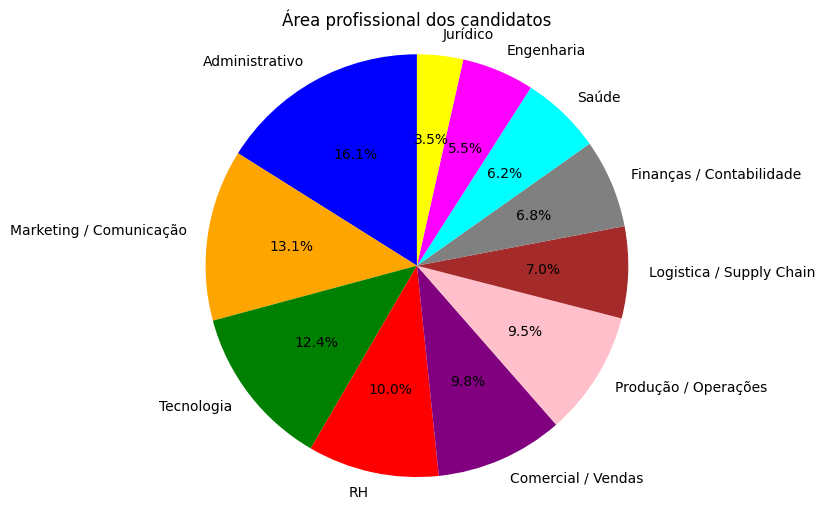

In [ ]:
# Carregando os dados do arquivo CSV
data_user_objectives = pd.read_csv(tabelas + "/user_interests_inteli.csv")

# Contando a quantidade de ocorrências de cada área profissional
values = data_user_objectives['name'].value_counts()

# Definindo as cores para cada fatia do gráfico
colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

# Criando uma figura para o gráfico com tamanho 6x6
plt.figure(figsize=(6, 6))

# Estabelecendo o título
plt.title('Área profissional dos candidatos')

# Usando plt.pie() com as cores definidas
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, colors=colors)
plt.axis('equal')

plt.show()

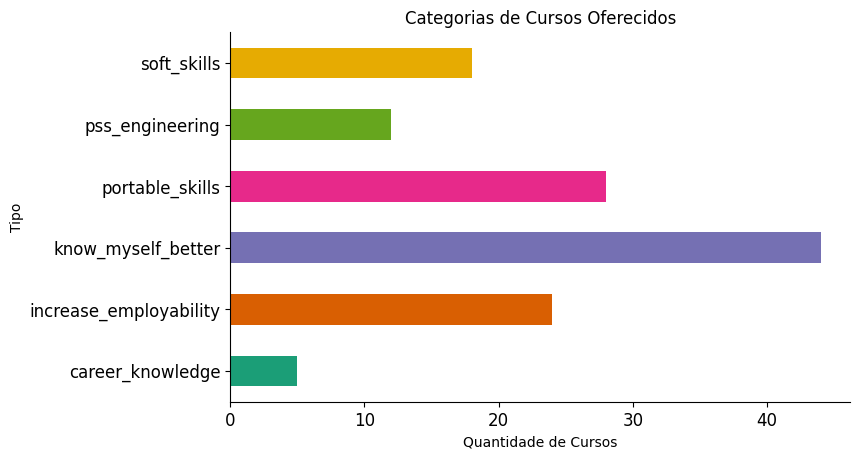

In [ ]:
# Importa a função autoviz da biblioteca google.colab
from google.colab import autoviz

# Define uma função chamada categorical_histogram que recebe um DataFrame, o nome de uma coluna,
# o tamanho da figura e o nome da paleta de cores como parâmetros
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    # Cria uma nova figura com tamanho baseado no valor de figscale
    plt.figure(figsize=(8*figscale, 4.8*figscale))

    # Agrupa os dados do DataFrame pela coluna especificada (colname) e cria um histograma de barras horizontais (barh)
    # Usa uma paleta de cores do matplotlib baseada no nome fornecido (mpl_palette_name)
    ax = df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name))

    # Remove as bordas superior e direita do gráfico
    plt.gca().spines[['top', 'right']].set_visible(False)

    # Adiciona um título ao gráfico
    plt.title("Categorias de Cursos Oferecidos")

    # Adiciona um label ao eixo x para indicar a quantidade de cursos
    plt.xlabel("Quantidade de Cursos")

    # Define a mensagem do eixo y como "Tipo"
    plt.ylabel("Tipo")

    # Ajusta o tamanho da fonte dos rótulos nos eixos x e y
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Exibe o gráfico
    plt.show()

    # Retorna um objeto MplChart criado a partir do estado atual do matplotlib
    return autoviz.MplChart.from_current_mpl_state()

# Chama a função categorical_histogram com um DataFrame chamado df_encoded e o nome da coluna 'type'
chart = categorical_histogram(df_encoded, *['type'], **{})




Cursos e suas competências

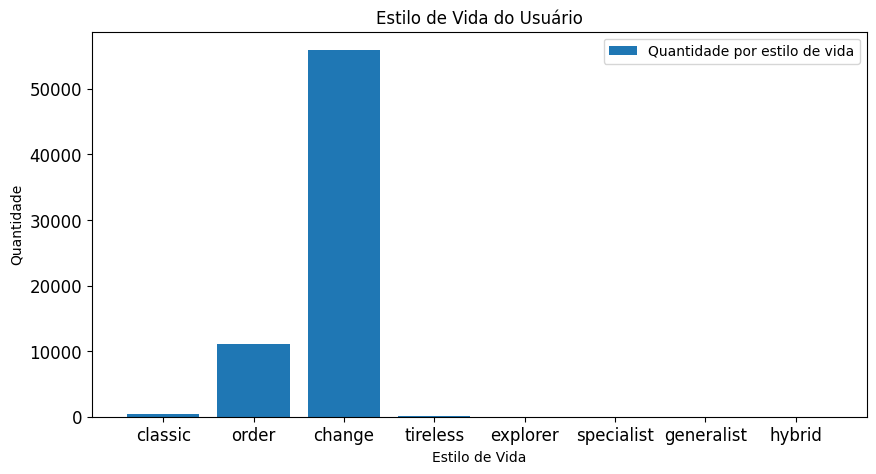

In [ ]:
# Criação de subplots, criando uma figura e um eixo (subplot) dentro da figura
fig, ax = plt.subplots(1, figsize=(10, 5))

# Obtém as chaves (estilos de vida) e valores (quantidades) do dicionário contador_lifestyle_users
lifestyles = list(contador_lifestyle_users.keys())
quantities = list(contador_lifestyle_users.values())

# Cria um gráfico de barras no subplot (eixo)
bars = ax.bar(lifestyle, quantities, label='Quantidade por estilo de vida')

# Define o título do gráfico
ax.set_title('Estilo de Vida do Usuário')

# Define o rótulo do eixo x
ax.set_xlabel('Estilo de Vida')

# Define o rótulo do eixo y
ax.set_ylabel('Quantidade')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicione uma legenda com base nos rótulos fornecidos anteriormente
ax.legend()

# Mostra o gráfico
plt.show()


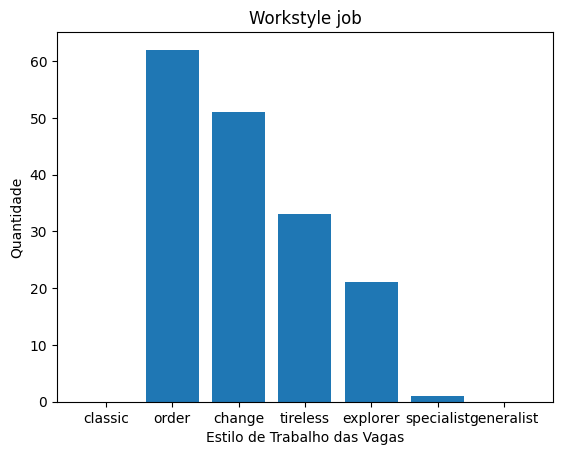

In [ ]:
# Criação de subplots, criando uma figura e um eixo (subplot) dentro da figura
fig, ax = plt.subplots(nrows=1, ncols=1)

# Lista de estilos de trabalho (workstyles)
workstyle = ['classic', 'order', 'change', 'tireless', 'explorer', 'specialist', 'generalist']

# Lista de valores correspondentes aos escores de cada workstyle
values_workstyle = [contador_workstyle_job['score_classic'], contador_workstyle_job['score_order'],
                    contador_workstyle_job['score_change'], contador_workstyle_job['score_tireless'],
                    contador_workstyle_job['score_explorer'], contador_workstyle_job['score_specialist'],
                    contador_workstyle_job['score_generalist']]

# Cria um gráfico de barras no subplot (eixo) com os estilos de trabalho no eixo x e os valores no eixo y
ax.bar(workstyle, values_workstyle)

# Define o título do gráfico
ax.set_title('Workstyle job')

# Define o rótulo do eixo x
ax.set_xlabel('Estilo de Trabalho das Vagas')

# Define o rótulo do eixo y
ax.set_ylabel('Quantidade')

# Ajusta o tamanho da fonte dos rótulos no eixo x e y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Exibe o gráfico
plt.show()


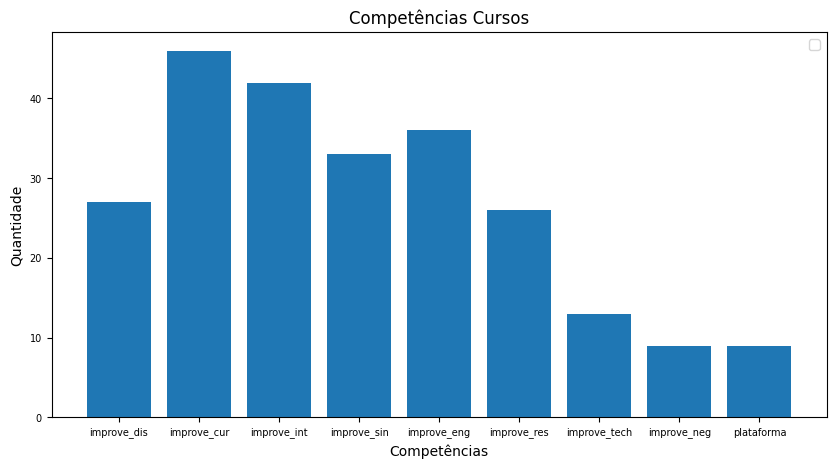

In [ ]:
# Criação de subplots, criando uma figura e um eixo (subplot) dentro da figura
fig, ax = plt.subplots(1, figsize=(10, 5))

# Criação de um gráfico de barras no segundo subplot (ax[1])
# Usando as chaves do dicionário compet_data como valores no eixo x
# E os valores do dicionário compet_data como valores no eixo y
ax.bar(compet_data.keys(), compet_data.values())

# Define o título do gráfico
ax.set_title('Competências Cursos')

# Define o rótulo do eixo x
ax.set_xlabel('Competências')

# Define o rótulo do eixo y
ax.set_ylabel('Quantidade')

# Ajusta o tamanho da fonte dos rótulos no eixo x e y
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Adiciona uma legenda ao gráfico
plt.legend()

# Exibe o gráfico
plt.show()


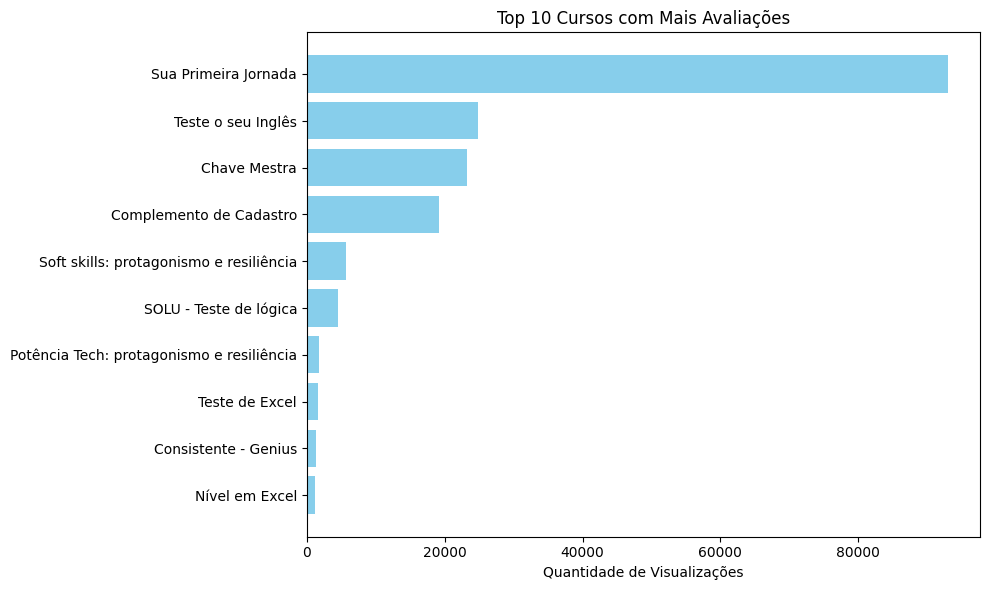

In [ ]:
# Criação de um dicionário vazio para armazenar os dados de cursos e visualizações
cursos_visu = {
    "name": [],
    "visu": []
}

# Preenchimento do dicionário com dados do DataFrame df_encoded
cursos_visu["name"] = df_encoded["name"].tolist()
cursos_visu["visu"] = df_encoded["ratings_count"].tolist()

# Conversão da coluna 'ratings_count' para o formato numérico e criação de um DataFrame chamado visualizacoes
visualizacoes = pd.DataFrame(cursos_visu)

# Ordenação do DataFrame visualizacoes pelo valor de visualizações em ordem decrescente
visualizacoes = visualizacoes.sort_values(by='visu', ascending=False)

# Seleção dos 10 cursos com mais visualizações
maiores = visualizacoes.head(10)

# Criação de uma figura e um eixo (subplot) dentro da figura
fig, ax = plt.subplots(figsize=(10, 6))

# Criação de um gráfico de barras horizontais (horizontal bar chart)
bars = ax.barh(maiores['name'], maiores['visu'], color='skyblue')

# Inversão da ordem dos cursos para que o curso com mais visualizações fique no topo
ax.invert_yaxis()

# Definição do título do gráfico
ax.set_title('Top 10 Cursos com Mais Avaliações')

# Definição do rótulo do eixo x
ax.set_xlabel('Quantidade de Visualizações')

# Ajuste de layout para melhor apresentação
plt.tight_layout()

# Exibição do gráfico
plt.show()


{'score_res': 25, 'score_eng': 9, 'score_int': 38, 'score_cur': 5, 'score_sin': 25, 'score_dis': 67}


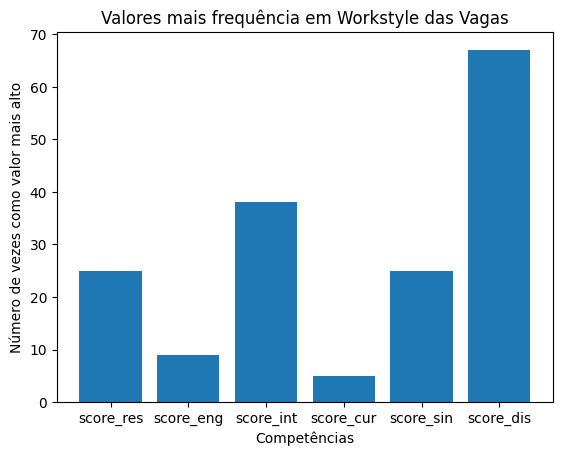

In [ ]:
# Imprime o dicionário contador_superfit_job
# O dicionário parece conter contagens de competências específicas associadas a vagas de emprego
print(contador_superfit_job)

# Criação de listas de rótulos e valores a partir do dicionário contador_superfit_job
rotulos = list(contador_superfit_job.keys())   # Lista de competências (rótulos)
valores = list(contador_superfit_job.values())  # Lista de contagens (valores)

# Criação de um gráfico de barras utilizando os rótulos e valores
# Os rótulos (competências) serão exibidos no eixo x e os valores no eixo y
plt.bar(rotulos, valores)

# Definição do rótulo do eixo x
plt.xlabel('Competências')

# Definição do rótulo do eixo y
plt.ylabel('Número de vezes como valor mais alto')

# Definição do título do gráfico
plt.title('Valores mais frequência em Workstyle das Vagas')

# Exibição do gráfico
plt.show()
